In [302]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

-

Settings

train = 0 </br>
valid = 1 </br>
test = 2 </br>
global test = 3 </br>

In [304]:
# Тип выборки
MODE = 3
# Номер переменной
VAR = 27 #27
# Число кластеров с наименьшей MAE на рассмотрение
TOP = 7
# Длина участка визуализации
LEN = 10

-

In [305]:
# data = pd.read_csv("./output_table_04-07_for60_2.csv")
data = pd.read_csv("./results/W20_group60/14_Agglomer_N11_w5.csv")
data = data[data["mode"].astype("int") == MODE]

In [306]:
# new_data = pd.DataFrame(data, columns=[])

In [307]:
# metafile = open("DataSet2_fix.json")
# metafile = json.load(metafile)


In [308]:
# CV_DV = [x[0] for x in metafile['ColumnKind'].items() if x[1] == "CV" or x[1] == "DV"]
# CV_DV = [x for x in list(columns) if x in CV_DV]
# # data = data[CV_DV]
# CV_DV

In [309]:
d = data.to_numpy()
mask = d[:, -1] == 3
Q = d.shape[-1] // 2 - 1
np.abs(d[mask, :Q] - d[mask, Q:2*Q]).mean(axis=0) / np.abs(d[mask][1:, :Q] - d[mask][:-1, :Q]).mean(axis=0)

array([0.10542942, 0.10490175, 0.05505643, 0.06506304, 0.3731296 ,
       0.37184548, 0.45467715, 0.40227131, 0.17028343, 0.08891043,
       0.3032218 , 0.48920088, 0.22571048, 0.03366576, 0.2576812 ,
       0.16480733, 0.4014814 , 0.3420665 , 0.23117852, 0.18655051,
       0.27149033, 0.18990808, 0.27864419, 0.1797006 , 0.29435315,
       0.32410087, 0.26914398, 0.25775761, 0.41517063, 0.25064038,
       0.38676502, 0.25554725, 0.50349942, 0.27573917, 0.4569345 ,
       0.28567666, 0.46311467, 0.31389402, 0.19125956, 0.35626111,
       0.39776332, 0.36225062, 0.33035112, 0.39647727, 0.27720571,
       0.3267614 , 0.46435932, 0.22194649, 0.44272143, 0.32765786,
       0.44668471, 0.43096571, 0.33342623, 0.28172931, 0.16973955,
       0.3092001 , 0.3181423 , 0.49724515, 0.21756908, 0.28070359,
       0.23465323, 0.43085121, 0.3208826 , 0.21109927, 0.52081672])

In [310]:
data.loc[:, ["real 0", "real 23", "real 8", "predicted 0", "predicted 8", "predicted 23", "cluster_num", "mode"]]

,real 0,real 23,real 8,predicted 0,predicted 8,predicted 23,cluster_num,mode
27185,68.57,56.418944,32.421734,68.566490,32.440952,56.845131,3.0,3.0
27186,68.57,67.770808,32.092739,68.562241,32.010593,69.031189,3.0,3.0
27187,68.57,67.243452,32.432242,68.567284,32.367558,68.440979,3.0,3.0
27188,68.57,68.532826,32.518031,68.566833,32.512859,69.461868,3.0,3.0
27189,68.57,69.936119,32.408761,68.567581,32.465347,70.138054,3.0,3.0
...,...,...,...,...,...,...,...,...
33962,67.40,49.725883,46.669343,67.400177,46.918507,49.239162,7.0,3.0
33963,67.40,51.598239,46.631150,67.402992,47.194988,51.171280,7.0,3.0
33964,67.40,55.092504,46.807692,67.399925,47.388641,55.712303,7.0,3.0
33965,67.40,55.905058,47.224086,67.395515,47.381653,56.238155,7.0,3.0


Оценим переменные

In [311]:
real = [x for x in data.columns if "real" in x]
predicted = [x for x in data.columns if "predicted" in x]
err = abs(data[real].values - data[predicted].values)
err = err[data["mode"] == MODE]
pd.DataFrame([dict(zip(real, err.mean(axis=0)))]).T.sort_values(0)[:10]

,0
real 2,0.001664
real 3,0.002192
real 16,0.003414
real 28,0.003532
real 0,0.006077
real 1,0.008455
real 6,0.024360
real 17,0.034232
real 9,0.036754
real 60,0.043553


In [312]:
data["mode"].value_counts()

3.0    6782
Name: mode, dtype: int64

In [313]:
AE = abs(data[f"real {VAR}"] - data[f"predicted {VAR}"])
AE = pd.DataFrame(dict(AE=AE, cluster_num=data["cluster_num"]))

In [314]:
AE

,AE,cluster_num
27185,0.104055,3.0
27186,0.898322,3.0
27187,0.211790,3.0
27188,0.113634,3.0
27189,0.221761,3.0
...,...,...
33962,0.857354,7.0
33963,0.634380,7.0
33964,1.114952,7.0
33965,0.233414,7.0


In [315]:
top = [AE[AE["cluster_num"] == c]["AE"].mean() for c in np.arange(AE["cluster_num"].max())]
top = np.argsort(top)

In [316]:
top

array([4, 3, 1, 7, 2, 9, 5, 0, 6, 8])

-

# Визуализация

(29, 2)
(3085, 2)
(168, 2)
(2925, 2)
(82, 2)
(33, 2)
(30, 2)


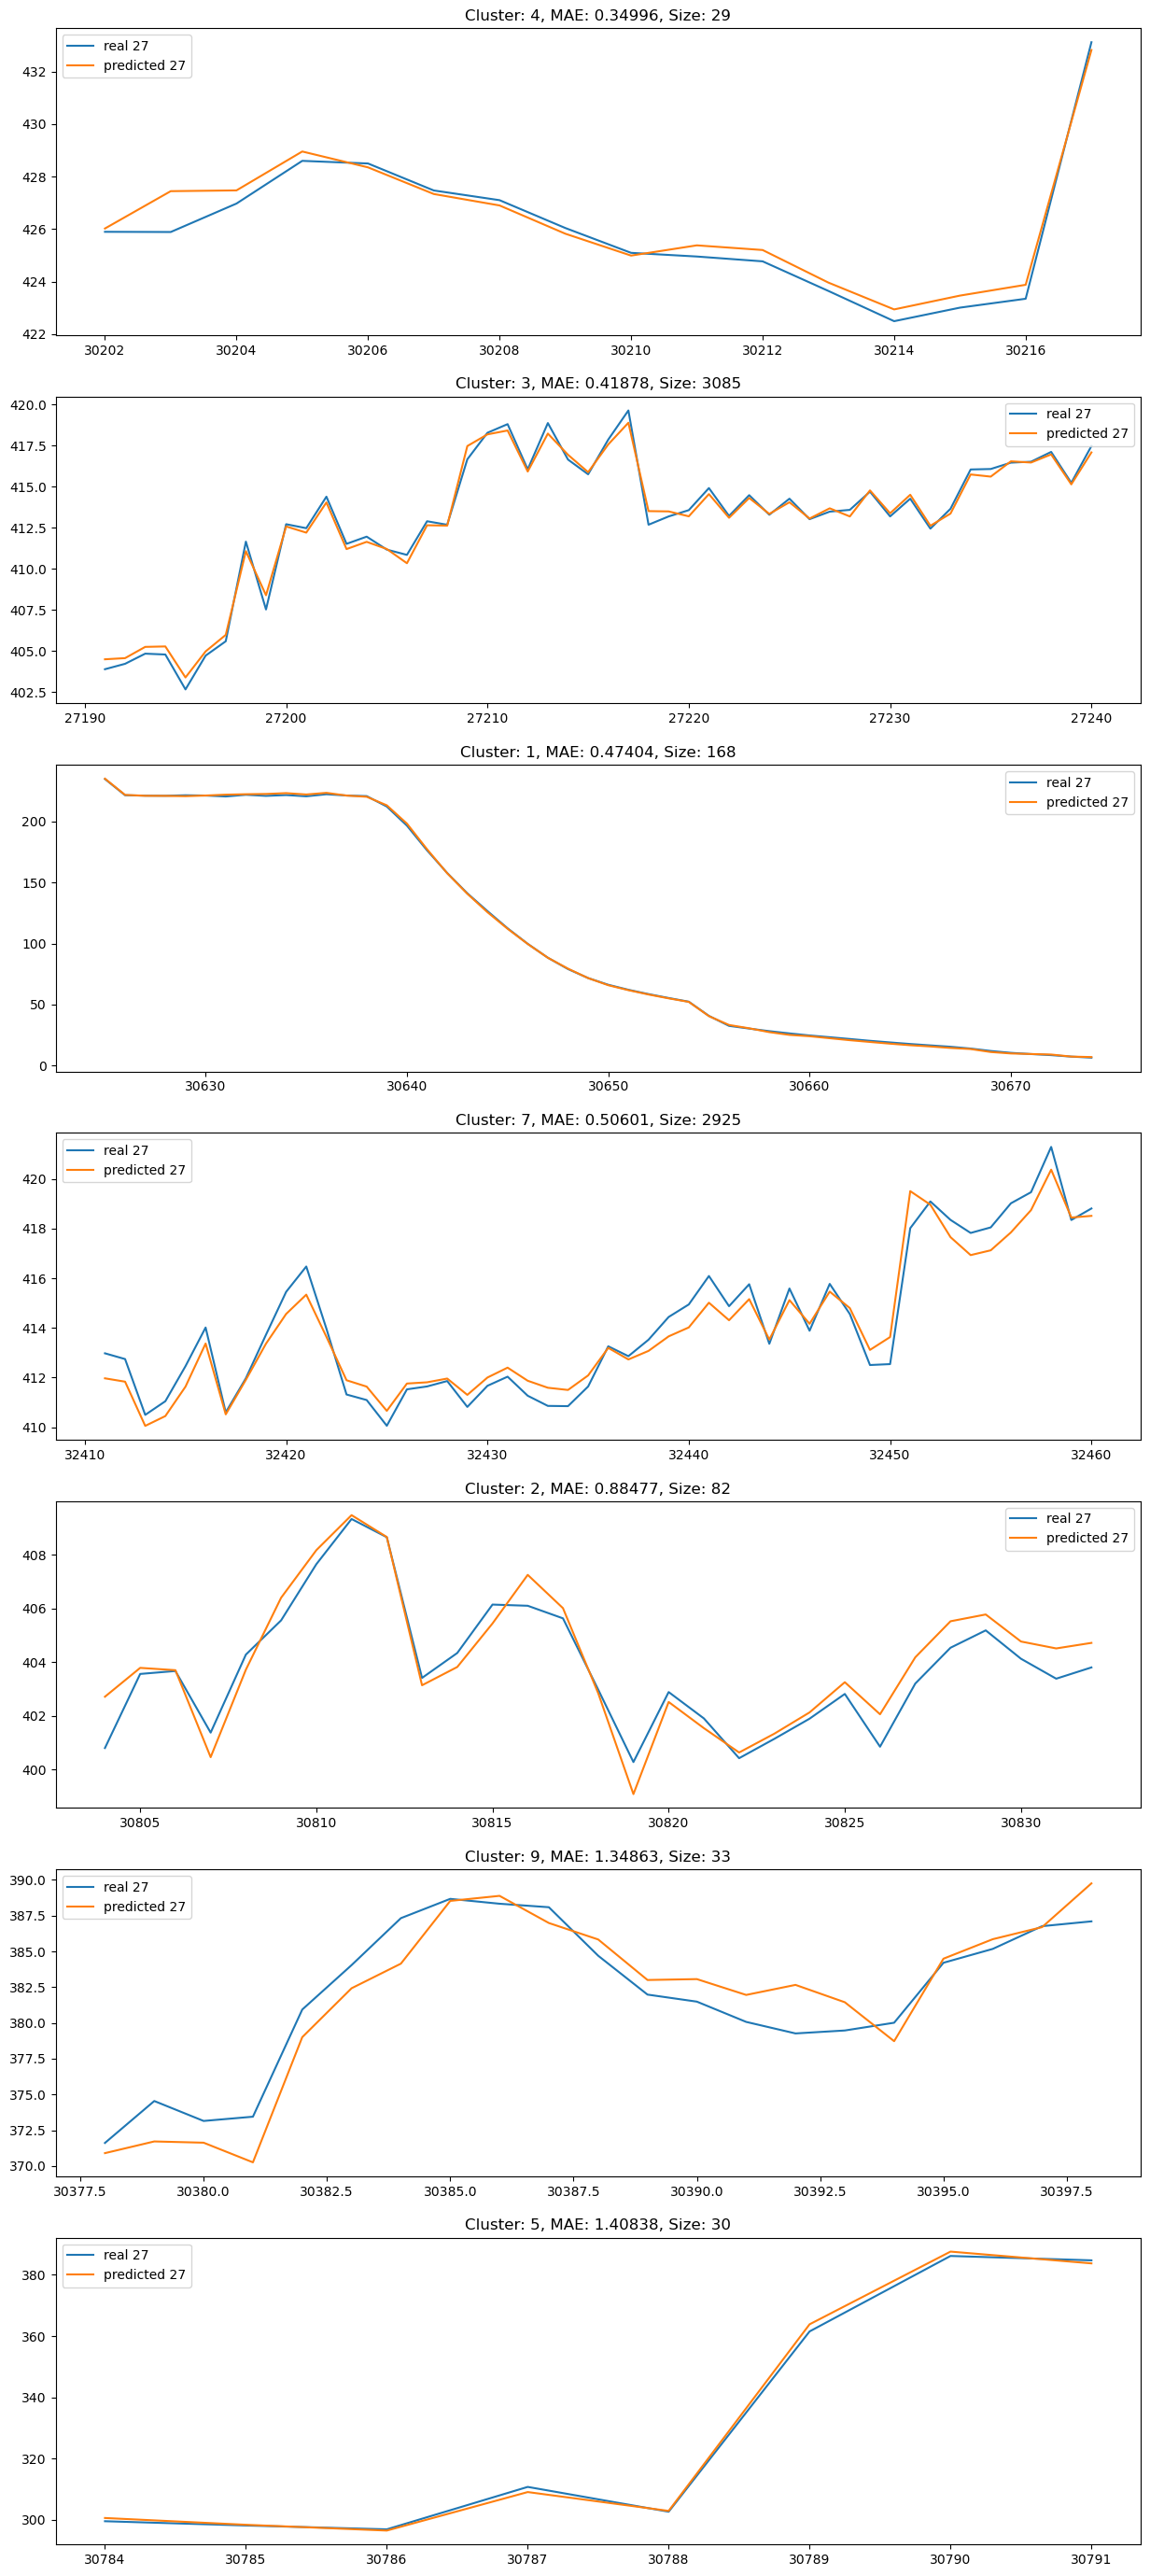

In [317]:
for i in range(min(TOP, len(top))):
    #print(int(f"{i+1}1{TOP}"))
    plt.subplot(int(f"{TOP}1{i+1}"))
    index = AE["cluster_num"] == top[i]
    plt.title(f"Cluster: {top[i]}, MAE: {AE[index]['AE'].mean():.5f}, Size: {sum(AE['cluster_num'] == top[i])}")
    cluster = data[[f"real {VAR}", f"predicted {VAR}"]][index]
    print(cluster.shape)
    # find continous index
#     print(cluster.index.shape)
    cont = np.split(cluster, np.where(np.diff(cluster.index) > 1)[0] + 1)
#     print([len(x) for x in cont])
    ind = np.argmax([len(x) for x in cont])
#     chunk = [x for x in cont if len(x) > LEN][-1]
    chunk = cont[ind]
    start = LEN * 3 // 5
    plt.plot(chunk[start:start+5*LEN])
    plt.legend(chunk.columns)
    
plt.gcf().set_size_inches(15, 5 * TOP)
# plt.savefig("top_clusters_visualize.png")
plt.show()